In [ ]:
!pip install opencv-python-headless matplotlib pillow

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import os

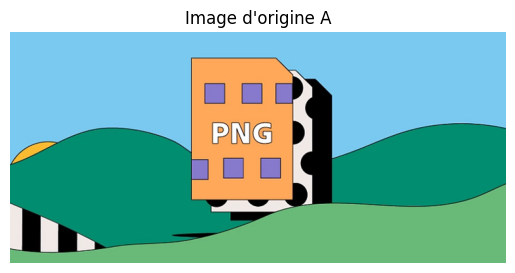

In [ ]:
# Load the image
image_path = 'test.png'
A = cv2.imread(image_path, cv2.IMREAD_COLOR)

# from BGR  to RGB
A_rgb = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(A_rgb)
#plt.imshow(A)
plt.title("Image d'origine A")
plt.axis('off')
plt.show()

In [ ]:
print(A[0, 0])  # Affiche les valeurs RGB du coin supérieur gauche
print(image_inverted[0, 0])  # Affiche les valeurs RGB après inversion


[240 201 122]
[133  54  15]


In [ ]:
height, width, channels = A.shape

print(f"Image Dimensions: Height = {height}, Width = {width}, Channels  = {channels}")

Image Dimensions: Height = 153, Width = 329, Channels  = 3


In [ ]:
# Save as JPG
cv2.imwrite('image_out.jpg', A)

# Save as TIFF
cv2.imwrite('image_out.tiff', A)



True

In [ ]:

jpg_image = cv2.imread('image_out.jpg')
height, width, channels = jpg_image.shape
print(f"JPG Image Dimensions: Height = {height}, Width = {width}, Channels = {channels}")

tiff_image = cv2.imread('image_out.tiff')
height, width, channels = tiff_image.shape
print(f"TIFF Image Dimensions: Height = {height}, Width = {width}, Channels = {channels}")


JPG Image Dimensions: Height = 350, Width = 750, Channels = 3
TIFF Image Dimensions: Height = 350, Width = 750, Channels = 3


In [ ]:

png_size = os.path.getsize(image_path)
jpg_size =  os.path.getsize('image_out.jpg')
tiff_size = os.path.getsize('image_out.tiff')

print(f"PNG File Size: {png_size} bytes")
print(f"JPG File Size: {jpg_size} bytes")
print(f"TIFF File Size: {tiff_size} bytes")

PNG File Size: 71685 bytes
JPG File Size: 33948 bytes
TIFF File Size: 111922 bytes


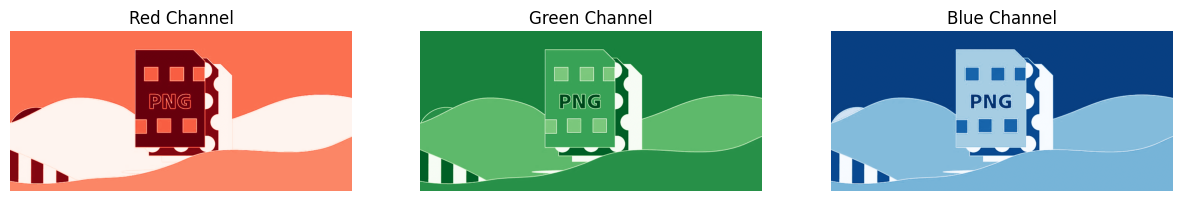

In [ ]:

red_channel = A_rgb[:, :, 0] # all rows, all columns, and  channel of red
green_channel = A_rgb[:, :, 1] # all rows, all columns, and  channel of green
blue_channel = A_rgb[:, :, 2] # all rows, all columns, and  channel of blue

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1) # subplot grid with 1 row, 3 columns, and the 1st subplot for the red
plt.imshow(red_channel, cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.title("Blue Channel")
plt.axis('off')

plt.show()

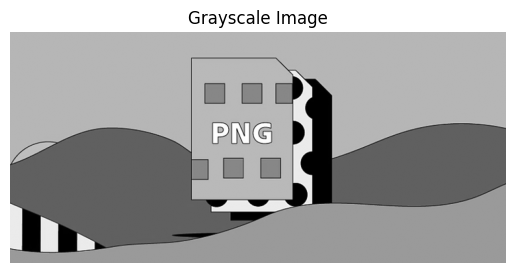

In [ ]:
gray_image = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)

# Display grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

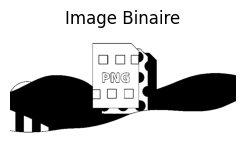

In [ ]:
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
plt.subplot(1,2,2)
plt.imshow(binary_image, cmap='gray')
plt.title("Image Binaire")
plt.axis('off')

plt.show()

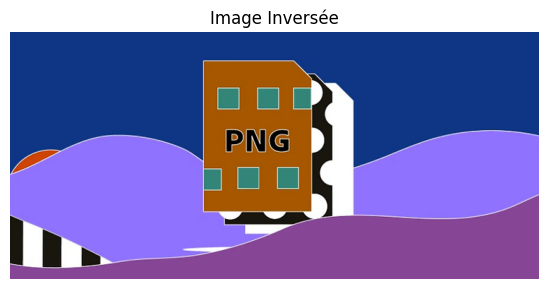

In [ ]:

image_inverted = 255 - A_rgb[0,]
image_gray_inverted = cv2.bitwise_not(binary_image)#gray_image)

# Afficher les images
plt.figure(figsize=(15,5))

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(image_inverted, cv2.COLOR_BGR2RGB))
plt.title("Image Inversée")
plt.axis('off')
plt.show()


<ipython-input-11-bd00550af577>:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_image.ravel(), 256, [0, 256])


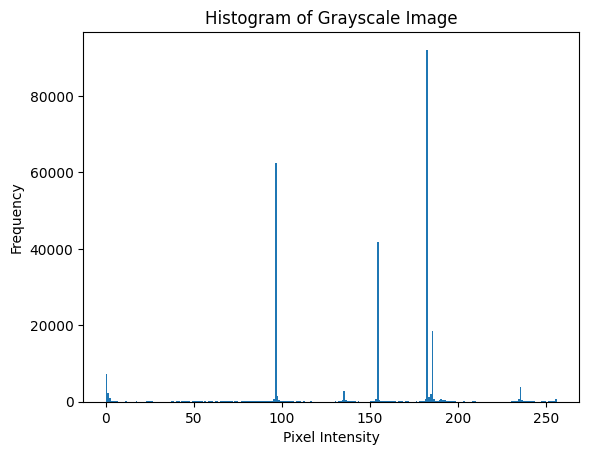

In [ ]:
plt.hist(gray_image.ravel(), 256, [0, 256])
plt.title("Histogram of Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

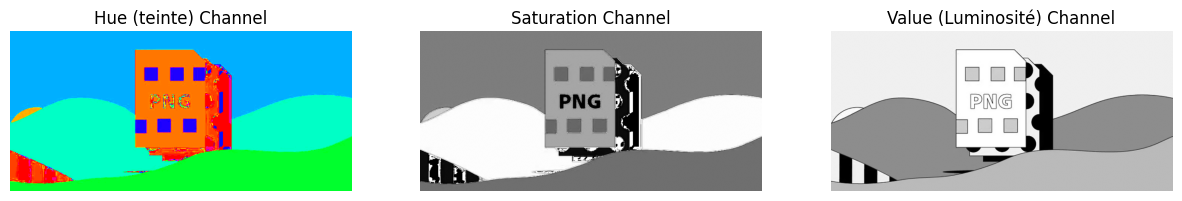

In [ ]:
# to HSV
hsv_image = cv2.cvtColor(A, cv2.COLOR_BGR2HSV)

# H, S, V channels
h_channel, s_channel, v_channel = cv2.split(hsv_image)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(h_channel, cmap='hsv')
plt.title("Hue (teinte) Channel")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(s_channel, cmap='gray')
plt.title("Saturation Channel")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(v_channel, cmap='gray')
plt.title("Value (Luminosité) Channel")
plt.axis('off')

plt.show()

In [ ]:
# Séparer les canaux
R, G, B = A_rgb[:, :, 0], A_rgb[:, :, 1], A_rgb[:, :, 2]

# Inverser chaque canal
R_inv = 255 - R
G_inv = 255 - G
B_inv = 255 - B

# Additionner les canaux inversés
sum_inverted = R_inv + G_inv + B_inv

# Normaliser pour éviter les dépassements (>255)
sum_inverted = np.clip(sum_inverted, 0, 255).astype(np.uint8)